In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Company_Data.csv")

In [3]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data['ShelveLoc'] = data['ShelveLoc'].astype('category')
data['Urban'] = data['Urban'].astype('category')
data['US'] = data['US'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [7]:
sales_mean = data.Sales.mean()
sales_mean

7.496325

In [8]:
data['High'] = data.Sales.map(lambda x: 1 if x > 8 else 0)  
data.High

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [10]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  High  
0         17      1   1     1  
1         10      1   1     1  
2         12      1   1     1  
3         14      1   1     0  
4         13      1   0     0

In [11]:
x=data.iloc[:,1:11]
y=data['High']

In [13]:
data.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced')

In [16]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

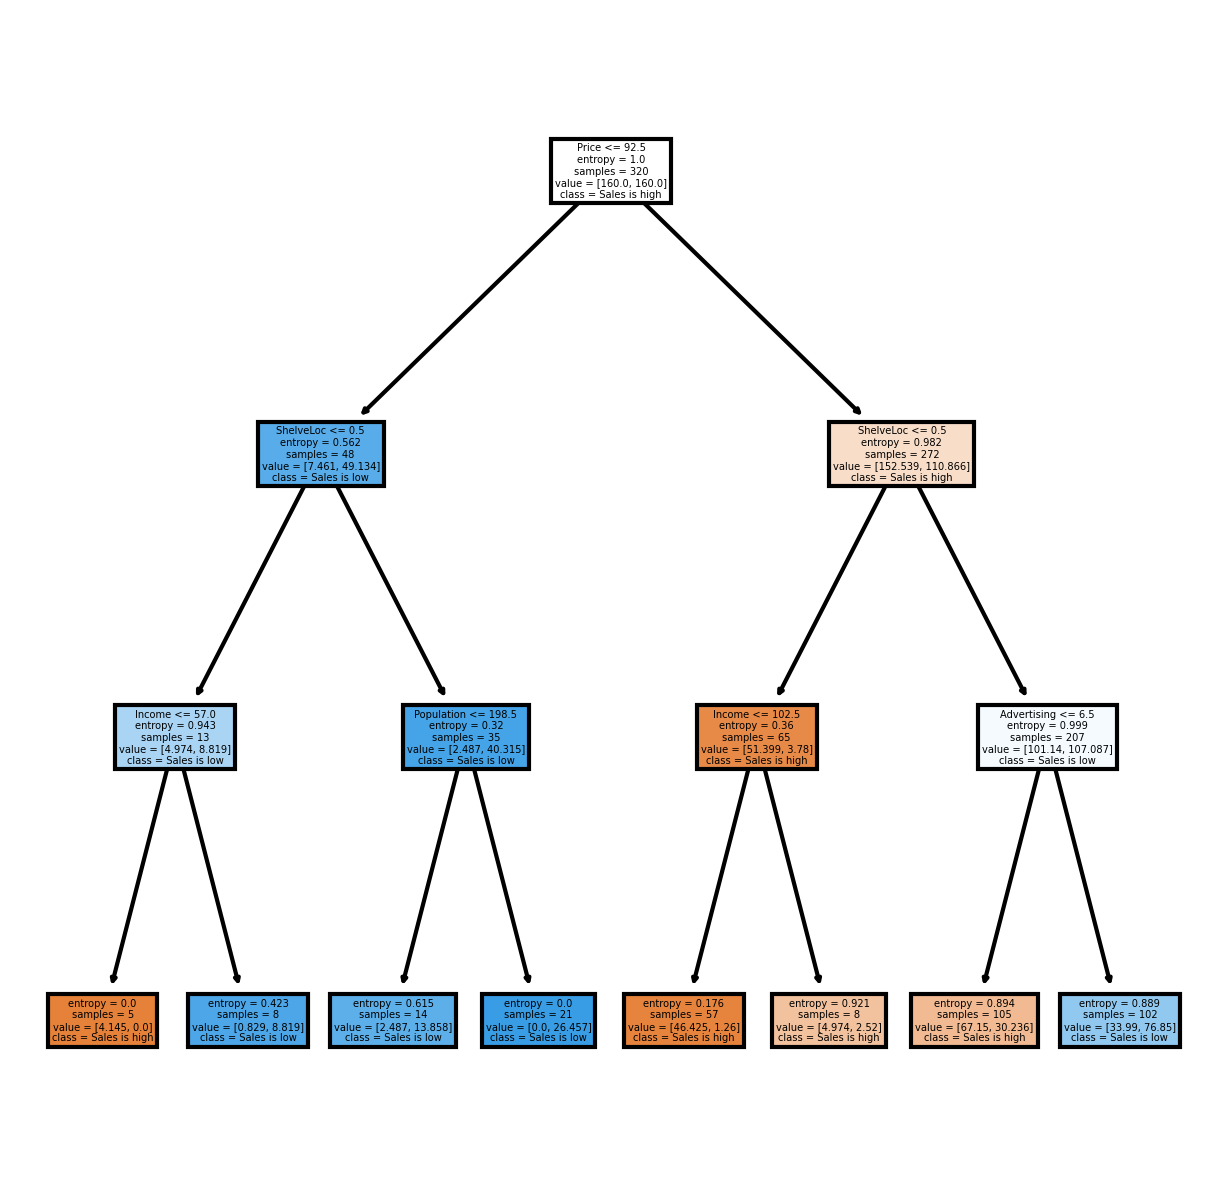

In [17]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] 
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(5,5), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [18]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [19]:
cross_table = pd.crosstab(y_test,preds)
cross_table

col_0   0   1
High         
0      33  10
1      12  25

In [20]:
np.mean(preds==y_test)

0.725

In [21]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.68      0.71      0.69        35

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



In [22]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced') 

In [23]:
model_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(0.5, 0.875, 'X[4] <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [160.0, 160.0]'),
 Text(0.25, 0.625, 'X[5] <= 0.5\ngini = 0.229\nsamples = 48\nvalue = [7.461, 49.134]'),
 Text(0.125, 0.375, 'X[1] <= 57.0\ngini = 0.461\nsamples = 13\nvalue = [4.974, 8.819]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [4.145, 0.0]'),
 Text(0.1875, 0.125, 'gini = 0.157\nsamples = 8\nvalue = [0.829, 8.819]'),
 Text(0.375, 0.375, 'X[6] <= 56.5\ngini = 0.109\nsamples = 35\nvalue = [2.487, 40.315]'),
 Text(0.3125, 0.125, 'gini = -0.0\nsamples = 21\nvalue = [0.0, 26.457]'),
 Text(0.4375, 0.125, 'gini = 0.258\nsamples = 14\nvalue = [2.487, 13.858]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\ngini = 0.487\nsamples = 272\nvalue = [152.539, 110.866]'),
 Text(0.625, 0.375, 'X[1] <= 102.5\ngini = 0.128\nsamples = 65\nvalue = [51.399, 3.78]'),
 Text(0.5625, 0.125, 'gini = 0.051\nsamples = 57\nvalue = [46.425, 1.26]'),
 Text(0.6875, 0.125, 'gini = 0.446\nsamples = 8\nvalue = [4.974, 2.52]'),
 Text(0.875, 0.375

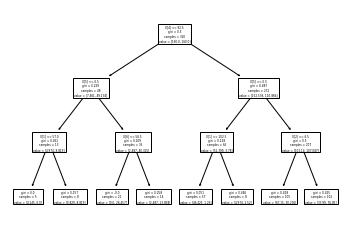

In [24]:
tree.plot_tree(model_1)

In [25]:
preds1 = model_1.predict(x_test)
preds1

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [26]:
pd.Series(preds1).value_counts()

0    45
1    35
dtype: int64

In [27]:
np.mean(preds1 == y_test)

0.725

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 

In [30]:
cmodel = dcmodel.fit(x_train,y_train)
y_predict = dcmodel.predict(x_test)

In [31]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  72.5


In [32]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  9]
 [13 24]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        43
           1       0.73      0.65      0.69        37

    accuracy                           0.73        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80

